In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
start = '2019-01-01'
end = '2024-01-01'
cash = 100000000
benchmark = yf.download('^SPX', start=start, end=end, interval='1d')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [3]:
date_list = benchmark.index[252:]
benchmark_returns = benchmark.pct_change().dropna().values[251:]
returns = pd.read_csv('results/testing_returns.csv', index_col=0).values[252:]

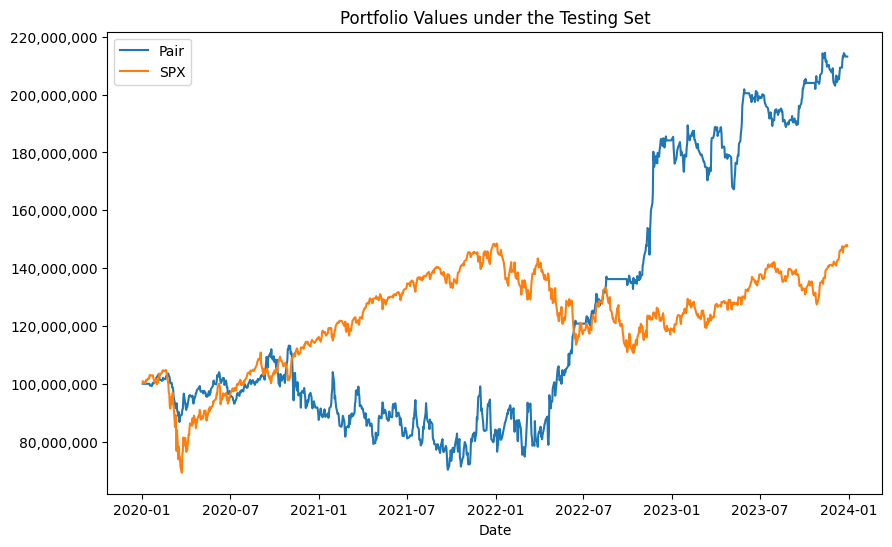

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(date_list, cash * np.cumprod(1 + returns), label='Pair')
plt.plot(date_list, cash * np.cumprod(1 + benchmark_returns), label='SPX')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Date')
plt.title('Portfolio Values under the Testing Set')
plt.legend()